<a href="https://colab.research.google.com/github/ahmedalaminn/CodePath-iOS101/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting Auto Claims Severity – Allstate

## 1. Business Understanding
- **Objective:** Predict the final cost (severity) of auto insurance claims using historical claim and vehicle data.  
- A model like this can bring value to Allstate, for example, by
  - Setting reserves to cover claim costs  
  - Routing claims to appropriate adjusters  
  - Identifying key features driving claim costs

# 2. Data Understanding
- **Dataset Overview:**  
  - Each row = a single auto insurance claim  
  - **Label:** `loss` (total paid amount)  
  - Continuous fields are scaled between 0 and 1  
  - Dataset is relatively clean, but **EDA is recommended**  
- **Features:**  
  - **Claim characteristics:** type of accident, time of day, passenger injuries, airbag deployment, highway indicator, report lag, reporter type, etc.  
  - **Vehicle characteristics:** vehicle value, age, year, make/model, etc.  
- **EDA Recommendations:**  
  - Analyze field distributions; detect anomalies, missing values, outliers  
  - Examine categorical feature levels and their population  
  - Compute correlations and visualize univariate relationships between features and the label

## Setup

In [ ]:
# Imports
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

In [ ]:
# Upload dataset from google drive
from google.colab import drive
drive.mount('/content/gdrive')
path = "/content/gdrive/MyDrive/claims_data.csv"

Mounted at /content/gdrive


In [ ]:
# so i am able to see every row and col bc by default outputs are shortened
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## General

In [ ]:
df = pd.read_csv(path)
df.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,B,D,B,D,C,B,B,B,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,D,B,B,D,D,D,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,C,A,A,A,B,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [ ]:
df.shape # (188318 claims, 131 features)

(188318, 132)

In [ ]:
df.dtypes.value_counts() # 116 categorical features, 15 continuous features, 1 id (int 64)

,count
object,116
float64,15
int64,1


In [ ]:
df.isnull().sum() # no null values, good

,0
id,0
cat1,0
cat2,0
cat3,0
cat4,0
cat5,0
cat6,0
cat7,0
cat8,0
cat9,0


In [ ]:
cont_cols = [c for c in df.columns if df[c].dtype == 'float64' and c != 'loss']
cat_cols = [c for c in df.columns if df[c].dtype == 'object']

## Looking at continuous features

In [ ]:
df.describe(include = 'float64')

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


array([[<Axes: title={'center': 'cont1'}>,
        <Axes: title={'center': 'cont2'}>,
        <Axes: title={'center': 'cont3'}>,
        <Axes: title={'center': 'cont4'}>],
       [<Axes: title={'center': 'cont5'}>,
        <Axes: title={'center': 'cont6'}>,
        <Axes: title={'center': 'cont7'}>,
        <Axes: title={'center': 'cont8'}>],
       [<Axes: title={'center': 'cont9'}>,
        <Axes: title={'center': 'cont10'}>,
        <Axes: title={'center': 'cont11'}>,
        <Axes: title={'center': 'cont12'}>],
       [<Axes: title={'center': 'cont13'}>,
        <Axes: title={'center': 'cont14'}>, <Axes: >, <Axes: >]],
      dtype=object)

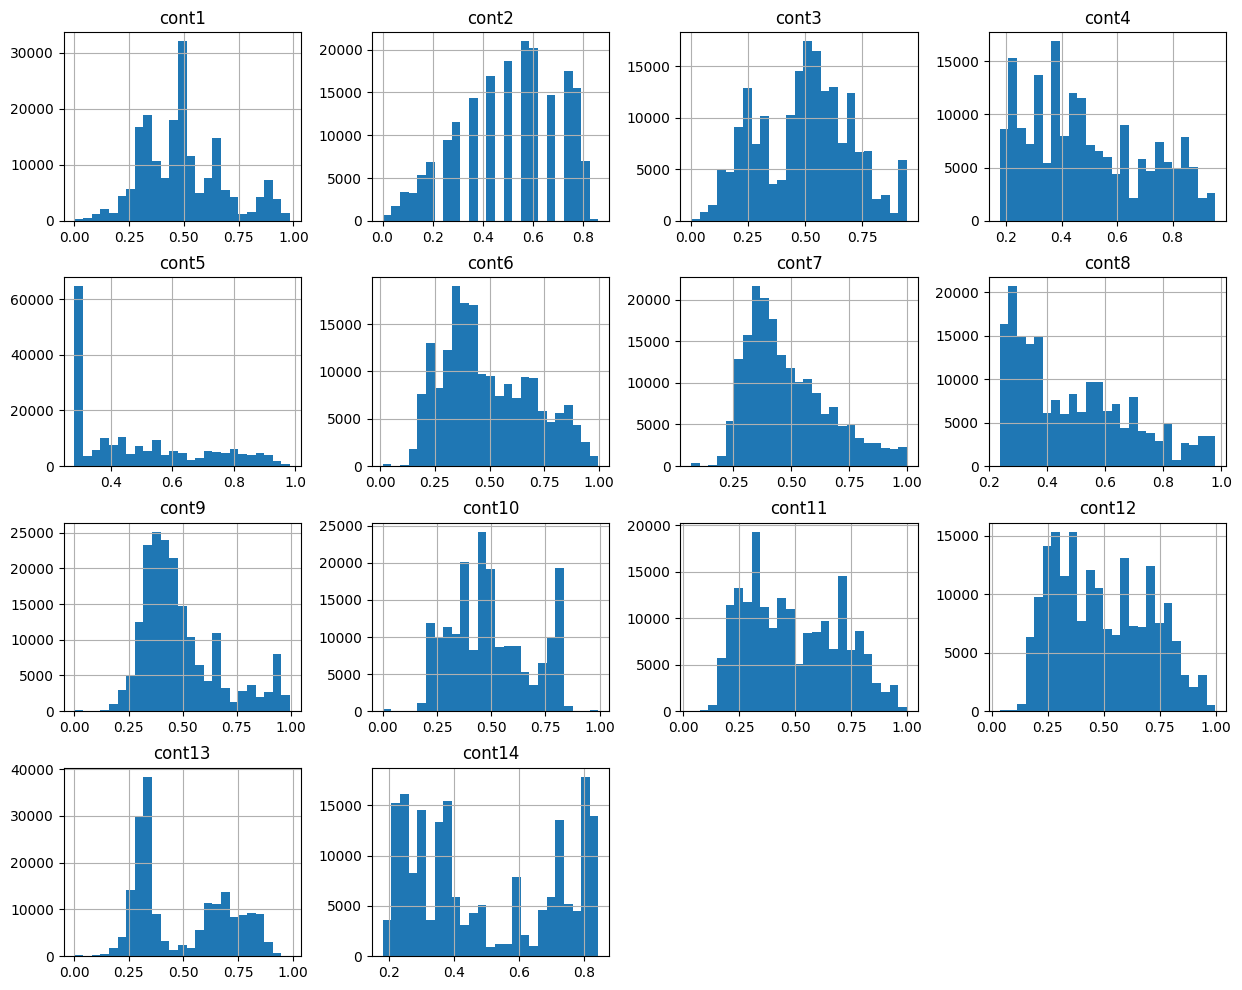

In [ ]:
df[cont_cols].hist(figsize=(15, 12), bins = 25)

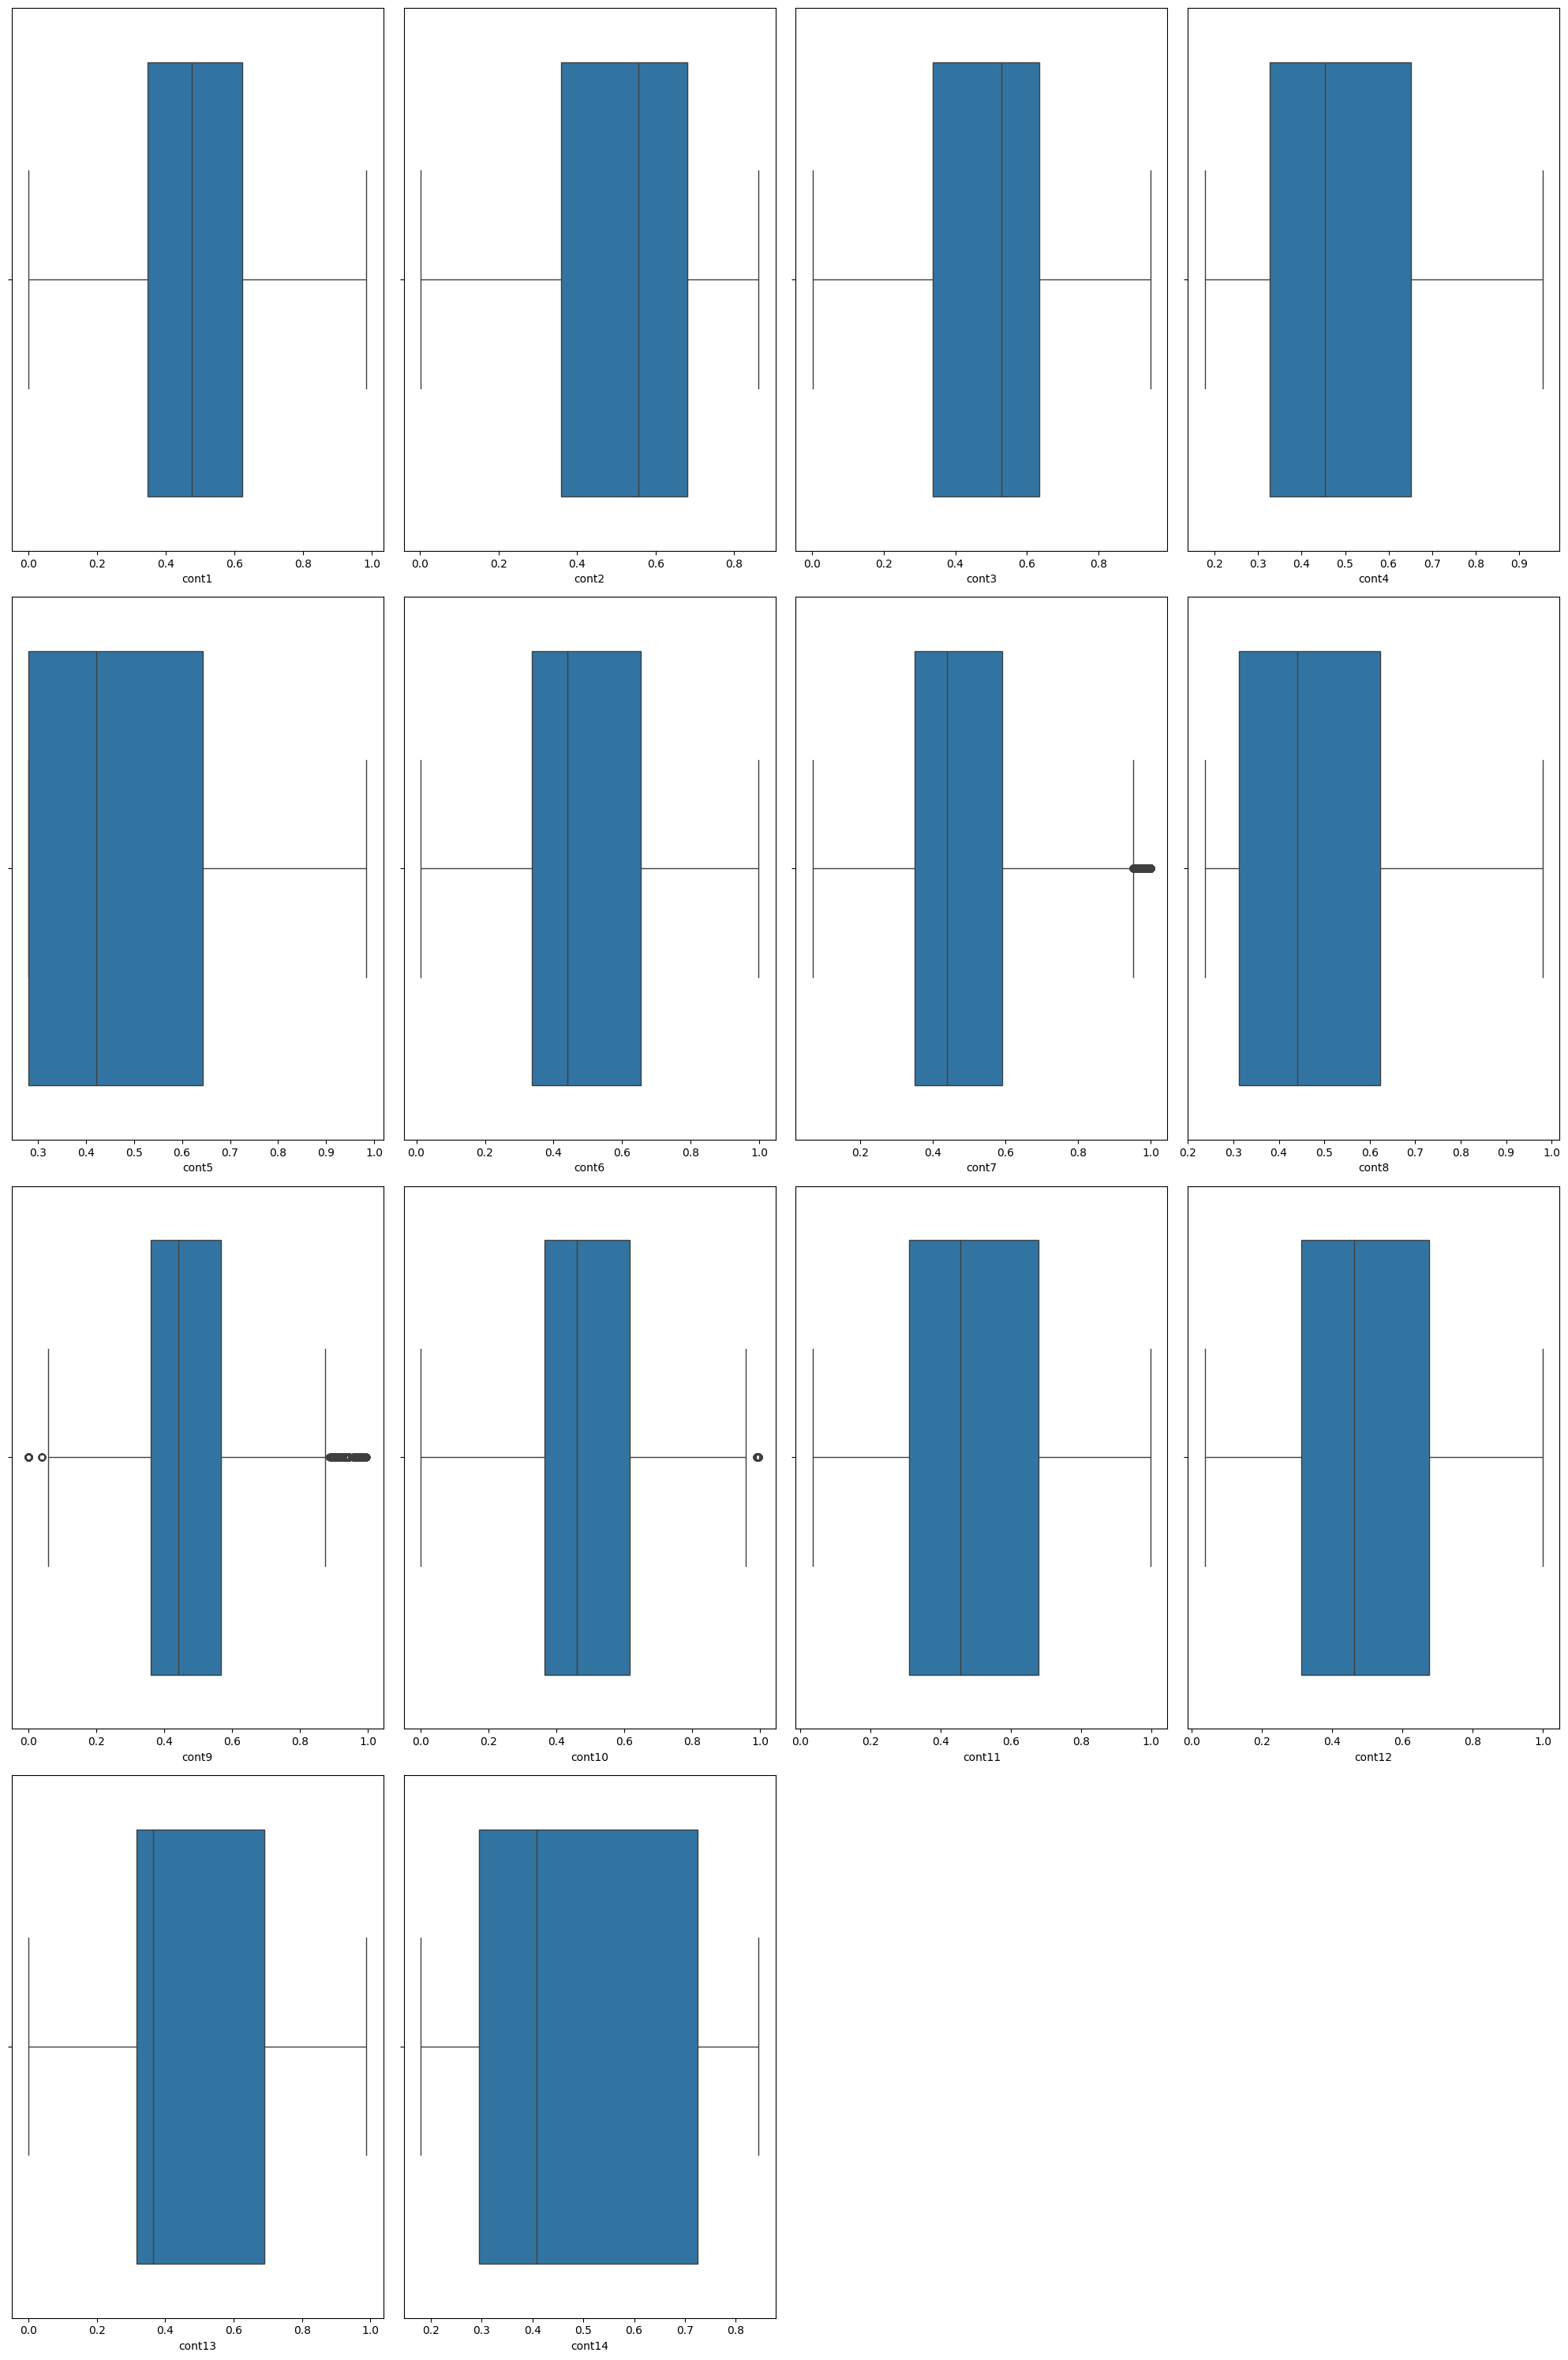

In [ ]:
plt.figure(figsize=(20, 30))
for i, c in enumerate(cont_cols):
    plt.subplot(len(cont_cols)//4 + 1, 4, i + 1)
    sns.boxplot(x=df[c])
plt.tight_layout()
plt.show()

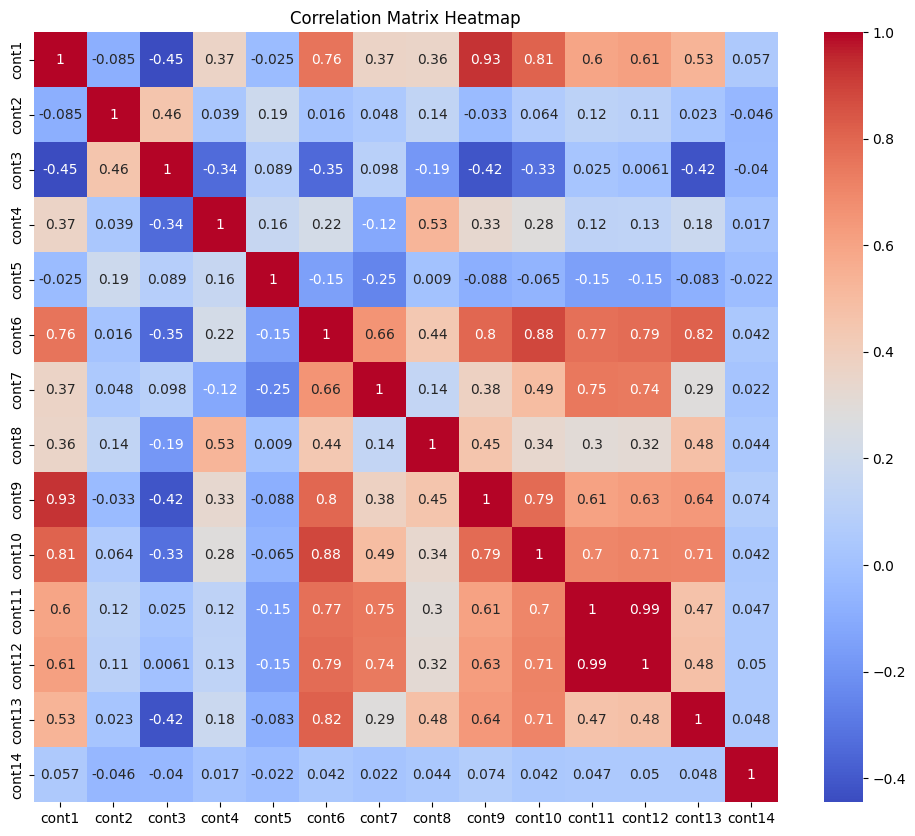

In [ ]:
correlation_matrix = df[cont_cols].corr()

# Correlation heatmap for continuous features
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
z_scores = stats.zscore(df[cont_cols])
outliers_z = (abs(z_scores) > 3)  # 3 std deviations
rows_with_outliers_z = df[outliers_z.any(axis=1)]

print(len(rows_with_outliers_z))

0


## Looking at categorical features

In [ ]:
df[cat_cols].nunique()

,0
cat1,2
cat2,2
cat3,2
cat4,2
cat5,2
cat6,2
cat7,2
cat8,2
cat9,2
cat10,2


In [ ]:
counts = []

for c in cat_cols:
    vc = df[c].value_counts()
    for cat, count in vc.items():
        counts.append({"feature": c, "category": cat, "count": count})

df_counts = pd.DataFrame(counts)
df_counts

,feature,category,count
0,cat1,A,141550
1,cat1,B,46768
2,cat2,A,106721
3,cat2,B,81597
4,cat3,A,177993
5,cat3,B,10325
6,cat4,A,128395
7,cat4,B,59923
8,cat5,A,123737
9,cat5,B,64581


In [ ]:
rare_threshold = 0.01
for c in cat_cols:
    freq = df[c].value_counts(normalize=True)
    rare_cats = freq[freq < rare_threshold].index.tolist()
    if rare_cats:
        print(f"{c} has rare categories: {rare_cats}")

cat15 has rare categories: ['B']
cat17 has rare categories: ['B']
cat18 has rare categories: ['B']
cat19 has rare categories: ['B']
cat20 has rare categories: ['B']
cat21 has rare categories: ['B']
cat22 has rare categories: ['B']
cat32 has rare categories: ['B']
cat33 has rare categories: ['B']
cat34 has rare categories: ['B']
cat35 has rare categories: ['B']
cat42 has rare categories: ['B']
cat46 has rare categories: ['B']
cat47 has rare categories: ['B']
cat48 has rare categories: ['B']
cat51 has rare categories: ['B']
cat55 has rare categories: ['B']
cat56 has rare categories: ['B']
cat58 has rare categories: ['B']
cat59 has rare categories: ['B']
cat60 has rare categories: ['B']
cat61 has rare categories: ['B']
cat62 has rare categories: ['B']
cat63 has rare categories: ['B']
cat64 has rare categories: ['B']
cat67 has rare categories: ['B']
cat68 has rare categories: ['B']
cat69 has rare categories: ['B']
cat70 has rare categories: ['B']
cat73 has rare categories: ['C']
cat74 has 

## Correlation/Univariate relationship between features and label (loss)

In [ ]:
# Continuous columns
cont_cols = [c for c in df.columns if df[c].dtype in ['float64', 'int64'] and c != 'loss']

# Correlation with loss
cont_corr = df[cont_cols + ['loss']].corr()['loss'].drop('loss').sort_values(key=abs, ascending=False)
cont_summary = pd.DataFrame({"feature": cont_corr.index, "corr_with_loss": cont_corr.values})
print("Continuous features correlation with loss:\n")
display(cont_summary)


Continuous features correlation with loss:



,feature,corr_with_loss
0,cont2,0.141528
1,cont7,0.119799
2,cont3,0.111053
3,cont11,0.099806
4,cont12,0.098724
5,cont6,0.040967
6,cont4,-0.035831
7,cont8,0.030508
8,cont10,0.020236
9,cont14,0.019298


In [ ]:
# Categorical columns
df['loss_bin'] = pd.qcut(df['loss'], q=4, labels=False)

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape)-1)))

# Compute Cramér's V with binned loss
cramersv_list = []
for c in cat_cols:
    cv = cramers_v(df[c], df['loss_bin'])
    cramersv_list.append({"feature": c, "cramers_v_with_loss": cv})

cramersv_df = pd.DataFrame(cramersv_list).sort_values('cramers_v_with_loss', ascending=False)
cramersv_df

,feature,cramers_v_with_loss
11,cat12,0.340870
9,cat10,0.297484
79,cat80,0.284860
0,cat1,0.265119
1,cat2,0.258581
8,cat9,0.246162
78,cat79,0.244337
71,cat72,0.236504
10,cat11,0.233257
12,cat13,0.226949


# 3. Data Preparation
- Handle remaining missing values, outliers, duplicates  
- Perform transformations if necessary (encoding, normalization already done)  
- Feature engineering if possible (limited due to anonymization)  

In [ ]:
df = df.drop(columns = ['id']) # drop id because it's useless

# 4. Modeling
- **Type:** Supervised Learning (Regression)  
- **Library:** TensorFlow/Keras  
- **Target Metric:** Mean Absolute Error (MAE)  


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['loss'])
y = df['loss']
X = pd.get_dummies(X, drop_first=True)  # converts all object categorical columns to numeric

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Z-score normalization (important)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Simple neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # regression output
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])


In [ ]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=1
)

Epoch 1/10
3767/3767 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 7951271.0000 - mae: 1719.3004 - val_loss: 3392488.2500 - val_mae: 925.2383
Epoch 2/10
3767/3767 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 2625249.7500 - mae: 856.1672 - val_loss: 2646498.2500 - val_mae: 794.8598
Epoch 3/10
3767/3767 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 2347696.2500 - mae: 757.1141 - val_loss: 3184893.5000 - val_mae: 766.5585
Epoch 4/10
3767/3767 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 2200994.7500 - mae: 732.8173 - val_loss: 4680040.0000 - val_mae: 763.6897
Epoch 5/10
3767/3767 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 2216000.5000 - mae: 725.4037 - val_loss: 9006070.0000 - val_mae: 777.6232
Epoch 6/10
3767/3767 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 2059923.3750 - mae: 707.3759 - val_loss: 16312616.0000 - val_mae: 821.3286
Epoch 7/10
3767/3767 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 2047919.5000 - mae: 705.9584 - val_loss: 29416964.0000 - val_mae: 835.6649
Epoch 8/10
3767/3767 ━━━━━━━━━━━━━━━━━

# 5. Evaluation
- **Baseline:** Mean model with MAE = 1970.11  
- Compare model performance against baseline  

In [ ]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae}")

1177/1177 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6830999.0000 - mae: 733.7554
Test MAE: 746.9459228515625



# 6. Deployment
<!-- - Predict future claim severity for business decision-making  
- Integrate model into claims processing workflows for routing or reserve estimation -->